### Read results

In [1]:
accuracy = {}
sbert = {}

with open('results.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        
        if line == "Model : t5-base\n" or line == "Model : t5-small\n":
            reading = None
            
            if line == "Model : t5-base\n":
                model = "Base"
            elif line == "Model : t5-small\n":
                model = "Small"

            accuracy[model] = {}
            accuracy[model]["fine_tune"] = []
            accuracy[model]["fine_tune_ex"] = []
            accuracy[model]["fine_tune_ex_first"] = []
            accuracy[model]["fine_tune_shex"] = []
            accuracy[model]["fine_tune_nv"] = []

            sbert[model] = {}
            sbert[model]["fine_tune_ex"] = []
            sbert[model]["fine_tune_ex_first"] = []
            sbert[model]["fine_tune_shex"] = []
            sbert[model]["fine_tune_nv"] = []

        parts = line.strip().split(':')

        if parts[0] == "Task 1 ":
            reading = "Task 1"
        elif parts[0] == "Task 2 ": 
            reading = "Task 2"
        elif parts[0] == "Task 3 ":
            reading = "Task 3"
        elif parts[0] == "Task 3b ":
            reading = "Task 3b"
        elif parts[0] == "Task 4 ":
            reading = "Task 4"
        elif parts[0] == "Task 5 ":
            reading = "Task 5"
        elif parts[0] == "Test":
            reading = None
        
        if reading == "Task 1": #zero-shot
            if line[0]=="{":
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                accuracy[model]["zero_shot"] = value
                accuracy[model]["fine_tune"].append(value)
                accuracy[model]["fine_tune_ex"].append(value)
                accuracy[model]["fine_tune_ex_first"].append(value)
                accuracy[model]["fine_tune_shex"].append(value)
                accuracy[model]["fine_tune_nv"].append(value)
        
        if reading == "Task 2": #fine_tune
            if line[0]=="{":
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                accuracy[model]["fine_tune"].append(value)
        
        if reading == "Task 3": #fine_tune with ex
            if line[0]=="{":
                metrics = line.strip().split(',')

                parts = metrics[0].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                accuracy[model]["fine_tune_ex"].append(value)

                parts = metrics[1].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                sbert[model]["fine_tune_ex"].append(value)
        
        if reading == "Task 3b": #fine_tune with ex first
            if line[0]=="{":
                metrics = line.strip().split(',')

                parts = metrics[0].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                accuracy[model]["fine_tune_ex_first"].append(value)

                parts = metrics[1].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                sbert[model]["fine_tune_ex_first"].append(value)
        
        if reading == "Task 4": #fine_tune with shuffled ex
            if line[0]=="{":
                metrics = line.strip().split(',')
                
                parts = metrics[0].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                accuracy[model]["fine_tune_shex"].append(value)

                parts = metrics[1].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                sbert[model]["fine_tune_shex"].append(value)
        
        if reading == "Task 5": #fine_tune with shuffled ex
            if line[0]=="{":
                metrics = line.strip().split(',')
                
                parts = metrics[0].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                accuracy[model]["fine_tune_nv"].append(value)

                parts = metrics[1].strip().split(':')
                key, value = parts
                value = float(value.strip().strip('"')[:-1])
                sbert[model]["fine_tune_nv"].append(value)



In [2]:
print(accuracy)
print(sbert)

{'Base': {'fine_tune': [0.8033387622149837, 0.8909774436090225, 0.8984962406015038, 0.906421459053038, 0.9078439341597236, 0.9101808575492786, 0.9106888843730949, 0.9130258077626499, 0.9134322292217029, 0.9127209916683601], 'fine_tune_ex': [0.8033387622149837, 0.861511887827677, 0.8852875431822, 0.8896565738671, 0.88447470026417, 0.896464133306238, 0.901950823003454, 0.899817110343426, 0.902560455192034, 0.90337329811014, 0.907843934159723, 0.905710221499695, 0.908656777077829, 0.907539118065433], 'fine_tune_ex_first': [0.8033387622149837], 'fine_tune_shex': [0.8033387622149837, 0.87065637065637, 0.886913229018492, 0.896768949400528, 0.899512294249136, 0.90327169274537, 0.905608616134931, 0.909876041454988, 0.910790489737858, 0.910587279008331], 'zero_shot': 0.8033387622149837}, 'Small': {'fine_tune': [0.6550285016286646, 0.8461694777484251, 0.8569396464133306, 0.8623247307457834, 0.8643568380410486, 0.8667953667953668, 0.8698435277382646, 0.8724852672221093, 0.8733997155049786, 0.8743

### Plots

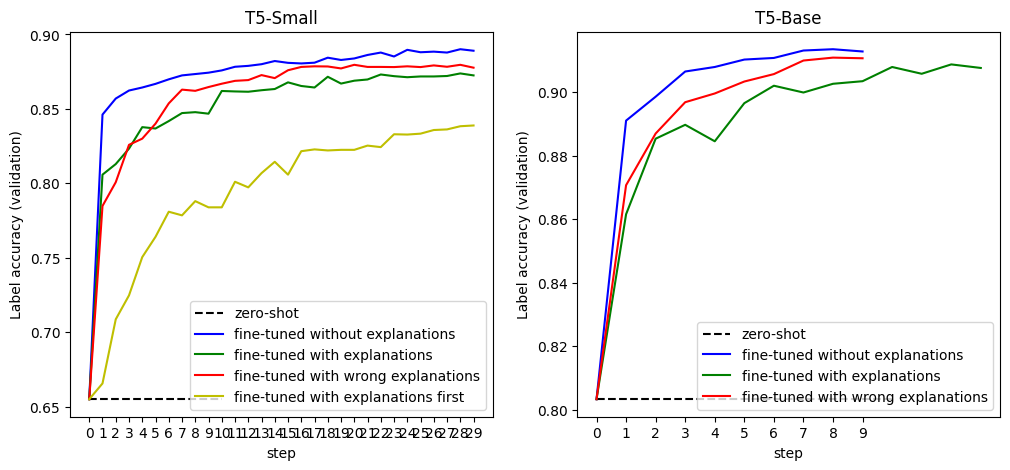

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize = [12, 5])

for j, model in enumerate(["Small", "Base"]):

    steps = [i for i in range(len(accuracy[model]["fine_tune"]))]
    steps_ex = [i for i in range(len(accuracy[model]["fine_tune_ex"]))]
    steps_shex = [i for i in range(len(accuracy[model]["fine_tune_shex"]))]

    axs[j].set_title(f"T5-{model}")

    axs[j].hlines(accuracy[model]["zero_shot"], 0, 10, "k", linestyle = "--", label = "zero-shot")
    axs[j].plot(steps, accuracy[model]["fine_tune"], "b", label = "fine-tuned without explanations")
    axs[j].plot(steps_ex, accuracy[model]["fine_tune_ex"], "g", label = "fine-tuned with explanations")
    axs[j].plot(steps_shex, accuracy[model]["fine_tune_shex"], "r", label = "fine-tuned with wrong explanations")

    axs[j].set_xticks(steps)
    axs[j].set_xlabel("step")
    axs[j].set_ylabel("Label accuracy (validation)")

    axs[j].legend(loc='lower right')

steps_ex_first = [i for i in range(len(accuracy["Small"]["fine_tune_ex_first"]))]
axs[0].plot(steps_ex_first, accuracy["Small"]["fine_tune_ex_first"], "y", label = "fine-tuned with explanations first")
axs[0].legend(loc='lower right')

Text(0.5, 1.0, 'Wrong explanations')

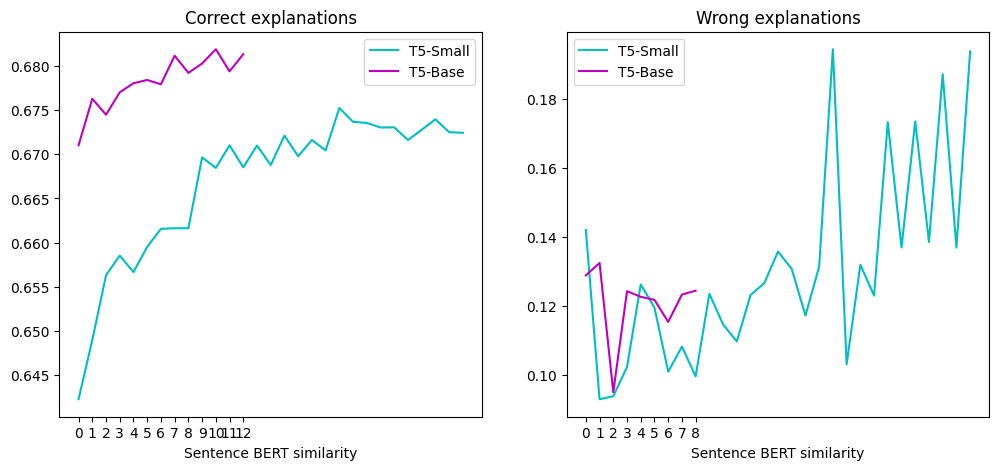

In [4]:
fig, axs = plt.subplots(1, 2, figsize = [12, 5])


for color, model in zip(["c","m"],["Small", "Base"]):
    steps_ex = [i for i in range(len(sbert[model]["fine_tune_ex"]))]
    axs[0].plot(steps_ex, sbert[model]["fine_tune_ex"], color, label = f"T5-{model}")
    
axs[0].legend()
axs[0].set_xticks(steps_ex)
axs[0].set_xlabel("step")
axs[0].set_xlabel("Sentence BERT similarity")
axs[0].set_title("Correct explanations")

for color, model in zip(["c","m"],["Small", "Base"]):
    steps_shex = [i for i in range(len(sbert[model]["fine_tune_shex"]))]
    axs[1].plot(steps_shex, sbert[model]["fine_tune_shex"], color, label = f"T5-{model}")

axs[1].legend()
axs[1].set_xticks(steps_shex)
axs[1].set_xlabel("step")
axs[1].set_xlabel("Sentence BERT similarity")
axs[1].set_title("Wrong explanations")
    